In [1]:
from systems.parse import parse
from systems.viz import as_dot
from IPython.core.display import HTML

import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

def as_html(model, results):
    rendered = model.render_html(results)    
    return HTML(rendered)

def results_for_spec(spec, rounds):
    model = parse(spec)
    results = model.run(rounds=rounds)
    return model, results


def chart(title, xlabel, ylabel, keys, named_results):
    named_lines = {}
    for name, results in named_results.items():
        for key in keys:
            line_name = key
            if name:
                line_name = name + " " + line_name            
            named_lines[line_name] = [x[key] for x in results]

    fig, ax = plt.subplots(figsize=(9, 4), layout='constrained')

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    if len(named_lines) == 1:
        line = list(named_lines.values())[0]
        ax.plot(line)
        return ax
    else:
        for name, line in named_lines.items():
            ax.plot(line, label=name)
        ax.legend()
        return ax


def multi_result_chart(title, xlabel, ylabel, key, named_results):
    named_lines = {}
    for name, results in named_results.items():
        named_lines[name] = [x[key] for x in results]

    fig, ax = plt.subplots(figsize=(9, 4), layout='constrained')

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    if len(named_lines) == 1:
        line = list(named_lines.values())[0]
        ax.plot(line)
        return ax
    else:
        for name, line in named_lines.items():
            ax.plot(line, label=name)
        ax.legend()
        return ax


In [3]:
spec = """
Requests(1000) > LoadBalancer @ Leak(0.99)
Requests > FailedRequests @ Leak(0.01)

LoadBalancer > Server @ Leak(0.9)
LoadBalancer > FailedRequests @ Leak(0.1)

Server > SuccessfulRequests @ Leak(0.9)
Server > FailedRequests @ Leak(0.9)
"""
model1, results1 = results_for_spec(spec, 50)

<Axes: title={'center': 'SuccessfulRequests'}, xlabel='Time', ylabel='SuccessfulRequests'>

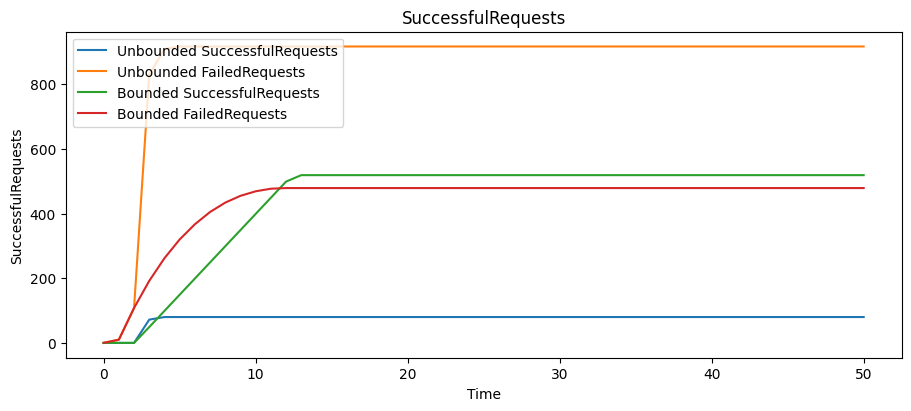

In [4]:
spec2 = """
Requests(1000) > LoadBalancer @ Leak(0.99)
Requests > FailedRequests @ Leak(0.01)

LoadBalancer > Server @ 50
LoadBalancer > FailedRequests @ Leak(0.1)

Server > SuccessfulRequests @ Leak(0.99)
Server > FailedRequests @ Leak(0.01)
"""

model2, results2 = results_for_spec(spec2, 50)
combined1 = {'Unbounded': results1, 'Bounded': results2 }
chart('SuccessfulRequests', 'Time', 'SuccessfulRequests', ['SuccessfulRequests', 'FailedRequests'], combined1)